# Ecuaciones de Lorenz
Un modelo simple basado en la dinámica de fluidos atmosféricos es representado mediante las ecuaciones de Lorenz, desarrollado por el meteorólogo Estadounidense Edward Lorenz:
\begin{eqnarray}
\frac{dx}{dt}&=&-\sigma x+\sigma y\\
\frac{dy}{dt}&=&rx-y-xz\\
\frac{dz}{dt}&=&-bz+xy
\end{eqnarray}
Lorenz desarrolló estas ecuaciones para representar la intensidad de movimiento de un fluido atmosférico. Donde $x$ representa la intensidad de movimiento convectivo, $y$ representa  la diferencia de temperatura horizontal en una celda de convección. Y $z$ representando lo que se aleja de la linealidad el perfil vertical de temperaturas del gas. Los parámetros $\sigma$, $r$ y $b$ son constantes que dependen de la viscosidad y la difusividad térmica del fluído.

---

Referencias:

- [El atractivo de Lorenz - Cuentos cuánticos](https://cuentos-cuanticos.com/2016/10/03/el-atractivo-de-lorenz/)
- [Número de Prandtl](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Prandtl)
- [Número de Rayleigh](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Rayleigh)

---
Usando $\sigma=10$, $b=\frac{8}{3}$ y $r=28$; condiciones iniciales $x_0=y_0=z_0=5$; encuentre la solución numérica y grafique.

In [1]:
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt

In [ ]:
#odeint?
#solve_ivp

In [2]:
# Sistema de ecuaciones
def fun(t,X,s,b,r): # X mayúscula involucra las tres varibles x,y y z
    dX=np.array([0,0,0])
    x = X[0]
    y = X[1]
    z = X[2]
    dX[0] = -s*x+s*y  #dx/dt
    dX[1] = r*x-y-x*z #dy/dt
    dX[2] = -b*z+x*y  #dz/dt
    return dX

In [3]:
# Condiciones iniciales
X0 = np.array([5,5,5]) # [x0,y0,z0]
t = (0,20)
sol = solve_ivp(fun,t,X0,args=(10,8/3,28),max_step=0.01) # args=(s,b,r)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 12074
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-02, 2.00000000e-02, ...,
       1.99826059e+01, 1.99926059e+01, 2.00000000e+01])
 t_events: None
        y: array([[ 5.        ,  5.0496418 ,  5.20119785, ...,  6.16447425,
         6.38815897,  6.56732692],
       [ 5.        ,  6.09091146,  7.18550764, ...,  8.36406535,
         8.75866153,  9.05972995],
       [ 5.        ,  5.13676473,  5.32903709, ..., 20.2480973 ,
        20.23986778, 20.25936354]])
 y_events: None

In [4]:
sol.y.shape

(3, 2005)

In [5]:
sol.t.shape

(2005,)

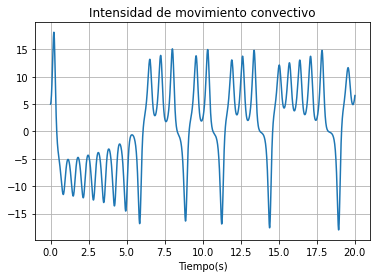

In [6]:
x = sol.y[0,:]
y = sol.y[1,:]
z = sol.y[2,:]
t = sol.t
plt.plot(t,x)
plt.xlabel('Tiempo(s)')
plt.title('Intensidad de movimiento convectivo')
plt.grid()

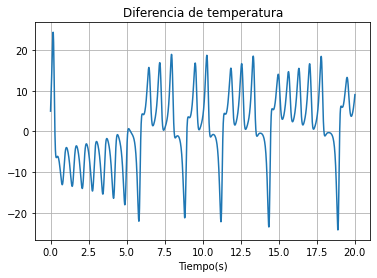

In [33]:
plt.plot(t,y)
plt.xlabel('Tiempo(s)')
plt.title('Diferencia de temperatura')
plt.grid()

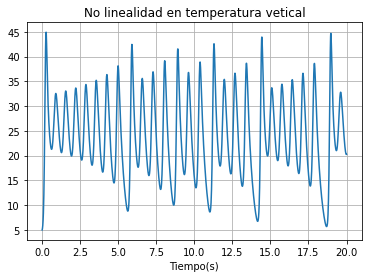

In [34]:
plt.plot(t,z)
plt.xlabel('Tiempo(s)')
plt.title('No linealidad en temperatura vetical')
plt.grid()

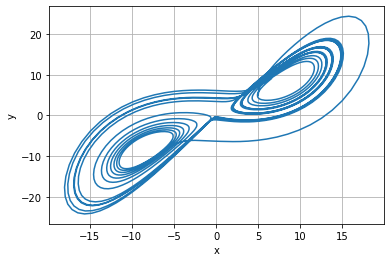

In [35]:
# Plano de fase
#
# x-y
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

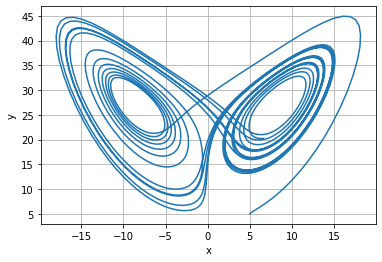

In [36]:
# x-z
plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.grid()

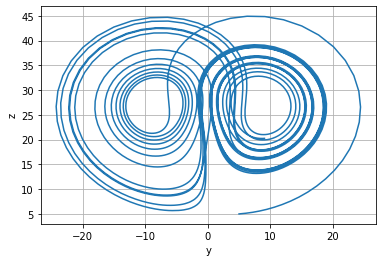

In [37]:
# y-z
plt.plot(y,z)
plt.xlabel('y')
plt.ylabel('z')
plt.grid()

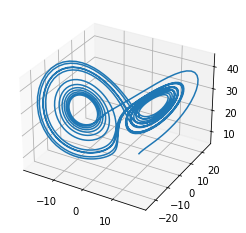

In [39]:
# En 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)